In [101]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import sys
import copy 
import pickle

import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.transforms import Affine2D

from astropy.io import fits
from astropy.wcs import WCS
from astropy import units as u
from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord
from astropy.visualization.wcsaxes import WCSAxes
from astropy.table import Table, Column, vstack, join

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data_dir = '/Users/song/Downloads/decals_color/'

In [182]:
brick_1_fits = fits.open(os.path.join(data_dir, 'legacysurvey-3166p125-image-r.fits.fz'))[1]
brick_1_wcs = WCS(brick_1_fits.header)

brick_1_jpg = mpimg.imread(os.path.join(data_dir, 'legacysurvey-3166p125-image.jpg'))
brick_1_jpg = np.flipud(brick_1_jpg)

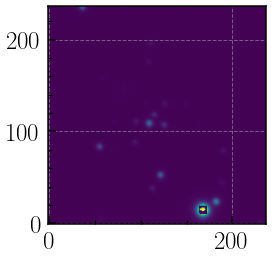

In [183]:
cen_coord = SkyCoord(316.7840 * u.deg, 12.5570 * u.deg)
cutout_size = 62.0 * u.arcsec

cutout_1 = Cutout2D(brick_1_fits.data, cen_coord, size=cutout_size, wcs=brick_1_wcs, mode='partial', fill_value=np.nan)
cutout_2 = Cutout2D(brick_2_fits.data, cen_coord, size=cutout_size, wcs=brick_2_wcs, mode='partial', fill_value=np.nan)
plt.imshow(np.arcsinh(cutout_1.data), origin='lower')

In [184]:
corner_1 = cutout_1.wcs.all_pix2world([0], [0], 0)
corner_2 = cutout_1.wcs.all_pix2world([230], [230], 0)

print(corner_1, corner_2)

[array([316.79281949]), array([12.54840189])] [array([316.77567842]), array([12.5651485])]


In [185]:
pixel_size = brick_1_wcs.proj_plane_pixel_scales()[0].to('arcsec').value

ra_0, ra_1 = 316.7753803, 316.79252141
dec_0, dec_1 = 12.5486931, 12.5654397
x_edge, y_edge = 10, 10
scale_bar_arcsec = 20.

corner_1 = brick_1_wcs.all_world2pix([ra_1], [dec_0], 1)
corner_2 = brick_1_wcs.all_world2pix([ra_0], [dec_1], 1)

x_0, x_1 = int(corner_1[0] - x_edge), int(corner_2[0] + x_edge)
y_0, y_1 = int(corner_1[1] - y_edge), int(corner_2[1] + y_edge)
x_size, y_size = int(x_1 - x_0), int(y_1 - y_0)

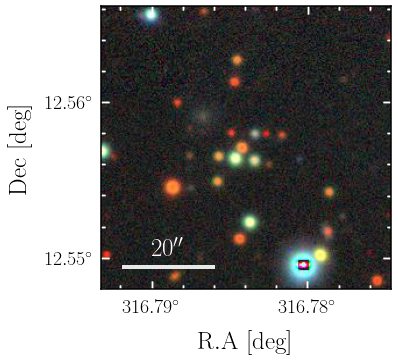

In [201]:
dpi = 48

fig = plt.figure(figsize=(x_size / dpi, y_size / dpi))


coord_meta = {}
coord_meta['name'] = 'ra', 'dec'
coord_meta['type'] = 'longitude', 'latitude'
coord_meta['wrap'] = 180, None
coord_meta['unit'] = u.deg, u.deg
coord_meta['format_unit'] = None, None

ax = fig.add_subplot(1, 1, 1, projection=brick_1_wcs, coord_meta=coord_meta)
ax.imshow(brick_1_jpg, aspect="auto")
ax.grid(on=False)

lon = ax.coords[0]
lat = ax.coords[1]

lon.set_axislabel(r'$\rm R.A\ [deg]$', fontsize=25)
lat.set_axislabel(r'$\rm Dec\ [deg]$', fontsize=25)

lon.set_major_formatter('d.dd')
lat.set_major_formatter('d.dd')

_ = ax.set_xlim(x_0, x_1)
_ = ax.set_ylim(y_0, y_1)

scale_bar_x_off, scale_bar_y_off = 20, 20
scale_bar = scale_bar_arcsec / pixel_size

_ = ax.plot(
    [x_0 + scale_bar_x_off, x_0 + scale_bar_x_off + scale_bar], 
    [y_0 + scale_bar_y_off, y_0 + scale_bar_y_off], linewidth=4, c='w', alpha=0.9)

_ = ax.text(
    x_0 + scale_bar_x_off + scale_bar / 2,
    y_0 + scale_bar_y_off * 1.5,
    r'$20^{\prime\prime}$', 
    fontsize=25, horizontalalignment='center', color='w')

ax.tick_params(color='w', labelsize=20)



In [179]:
brick_2_fits = fits.open(os.path.join(data_dir, 'legacysurvey-3169p125-image-r.fits.fz'))[1]
brick_2_wcs = WCS(brick_2_fits.header)

brick_2_jpg = mpimg.imread(os.path.join(data_dir, 'legacysurvey-3169p125-image.jpg'))
brick_2_jpg = np.flipud(brick_2_jpg)

pixel_size = brick_2_wcs.proj_plane_pixel_scales()[0].to('arcsec').value

ra_0, ra_1 = 316.79, 316.82
dec_0, dec_1 = 12.539, 12.574
x_edge, y_edge = 15, 10
scale_bar_arcsec = 30.

corner_1 = brick_2_wcs.all_world2pix([ra_1], [dec_0], 1)
corner_2 = brick_2_wcs.all_world2pix([ra_0], [dec_1], 1)

x_0, x_1 = int(corner_1[0] - x_edge), int(corner_2[0] + x_edge)
y_0, y_1 = int(corner_1[1] - y_edge), int(corner_2[1] + y_edge)
x_size, y_size = int(x_1 - x_0), int(y_1 - y_0)

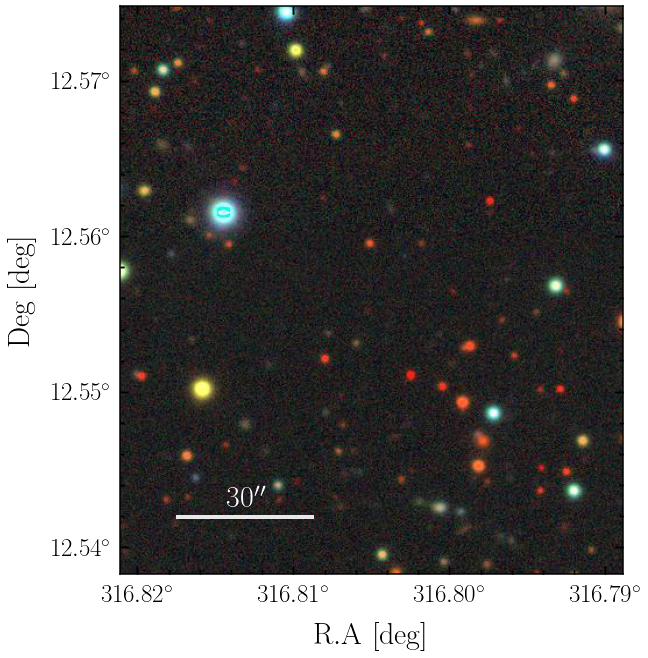

In [180]:
dpi = 48

fig = plt.figure(figsize=(x_size / dpi, y_size / dpi))

coord_meta = {}
coord_meta['name'] = 'ra', 'dec'
coord_meta['type'] = 'longitude', 'latitude'
coord_meta['wrap'] = 180, None
coord_meta['unit'] = u.deg, u.deg
coord_meta['format_unit'] = None, None

ax = fig.add_subplot(1, 1, 1, projection=brick_2_wcs, coord_meta=coord_meta)
ax.imshow(brick_2_jpg, aspect="auto")
ax.grid(on=False)

lon = ax.coords[0]
lat = ax.coords[1]

lon.set_axislabel(r'$\rm R.A\ [deg]$', fontsize=30)
lat.set_axislabel(r'$\rm Deg\ [deg]$', fontsize=30)

lon.set_major_formatter('d.dd')
lat.set_major_formatter('d.dd')

_ = ax.set_xlim(x_0, x_1)
_ = ax.set_ylim(y_0, y_1)

scale_bar_x_off, scale_bar_y_off = 50, 50
scale_bar = scale_bar_arcsec / pixel_size

_ = ax.plot(
    [x_0 + scale_bar_x_off, x_0 + scale_bar_x_off + scale_bar], 
    [y_0 + scale_bar_y_off, y_0 + scale_bar_y_off], linewidth=4, c='w', alpha=0.9)

_ = ax.text(
    x_0 + scale_bar_x_off + scale_bar / 2,
    y_0 + scale_bar_y_off * 1.2,
    r'$30^{\prime\prime}$', 
    fontsize=30, horizontalalignment='center', color='w')